###  Abalone Age Regression

***

##### About this Notebook 

The purpose of this project is to train a regression model that predicts the number of rings an abalone has. The number of rings indicates the age of the abalone, hence, we can predict how old the abalone is by predicting the number of rings. 

We assume the age of an abalone has some unknown relationship to the following 9 attributes; sex, length, diameter, height, whole weight, chucked weight, viscera weight, shell weight, and the number of rings. 

##### About the Data Set

The data set consists of 4177 unique abalone samples. We will be using a 80/20 data split for our training and testing data split. 

In [532]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [533]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [534]:
Data = pd.read_csv(r"Abalone_Data.csv")
df = pd.DataFrame(Data)
df.head(n = 4177)

,Sex,Length,Diameter,Height,Whole weight,Chucked weight,Viscera weight,Shell Weight,Number Of Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


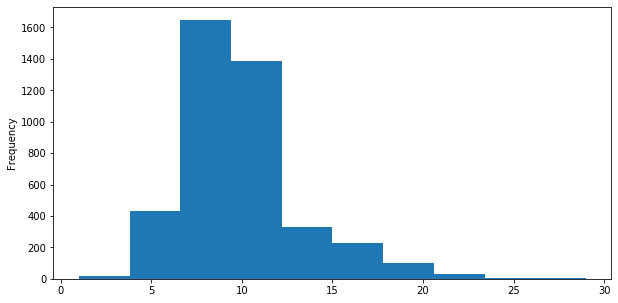

In [535]:
plt.figure(figsize = (10,5))
df['Number Of Rings'].plot(kind = "hist")

#### Categorical Variable

We need to transform our categorical variable 'Sex' into a variable that we can model within the regression model. In order to do this we setup dummy variables, or essentially the same as one-hot encoding. New_Data is our new data frame that contains our one-hot encoded categorical varibale "Sex"

In [536]:
New_Data = pd.get_dummies(Data, columns = ['Sex'])
New_Data.head()

,Length,Diameter,Height,Whole weight,Chucked weight,Viscera weight,Shell Weight,Number Of Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


#### Correlation Heatmap

Here we setup a variable correlation matrix. This allows us to view the correlation between each variable. 

If any of the variables had a very low correlation to our response variable (<0.30) we should consider removing it from our model. As we can see below we do not have any very small correlations between the predictors and response variable so we leave all the predictors in the model

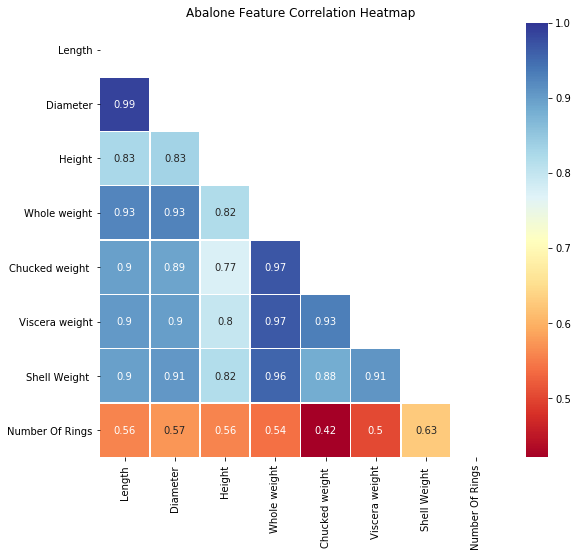

In [537]:
plt.figure(figsize = (9,8))
cor = df.corr()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor, mask=mask, annot = True, linewidths=0.5, cmap = plt.cm.RdYlBu).set(title='Abalone Feature Correlation Heatmap')
plt.show()

In [538]:
# We are dropping the response variable 

x = New_Data.drop(["Number Of Rings"], axis = 1).values
x2 = New_Data.drop(["Number Of Rings"], axis = 1)
y = New_Data["Number Of Rings"]
New_Data.head()

,Length,Diameter,Height,Whole weight,Chucked weight,Viscera weight,Shell Weight,Number Of Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


#### Training and Testing Data

Below we are using the train_test_split function from the sklearn library. The below line tells us the we will be sampling x_train and x_test from variable x. x is the data frame excluding our response variable of Number of rings. y_train and y_test are sampled from variable y which only contains our response variable Number of rings. Then we also have the test size set to 20% of the observations so that we have a train set containing 3341 observations and a test set containing the remaining 836 observations

In [539]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3341, 10) (3341,)
(836, 10) (836,)


In [540]:
lrm = LinearRegression()
lrm.fit(x_train, y_train)
y_pred = lrm.predict(x_test)

# Initializing metrics dataframe

model_metrics_test_data = pd.DataFrame(columns=['Model Type', 'Coefficient of Determination', 'Mean Absolute Error', 'Root Mean Square Error'])

entry = pd.DataFrame.from_dict({
     "Model Type": ['All Data'],
     "Coefficient of Determination":  [r2_score(y_test, y_pred)],
     "Mean Absolute Error": [mean_absolute_error(y_test, y_pred)],
     "Root Mean Square Error":  [np.sqrt(mean_squared_error(y_test, y_pred))]
})
model_metrics_test_data = pd.concat([model_metrics_test_data, entry], ignore_index=True)

Text(0, 0.5, 'Predicted Vales')

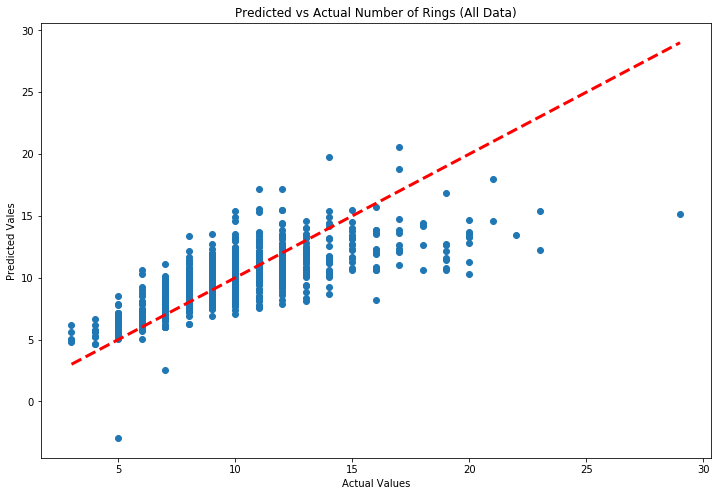

In [541]:
plt.figure(figsize = (12,8))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', c = 'red', lw = 3)
plt.title("Predicted vs Actual Number of Rings (All Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Vales")

#### Residual Plot

Below is a plot of the residuals for each observation our test set. These residuals are used to evaluate our model in calculating our model metrics

Text(0, 0.5, 'Residual Value')

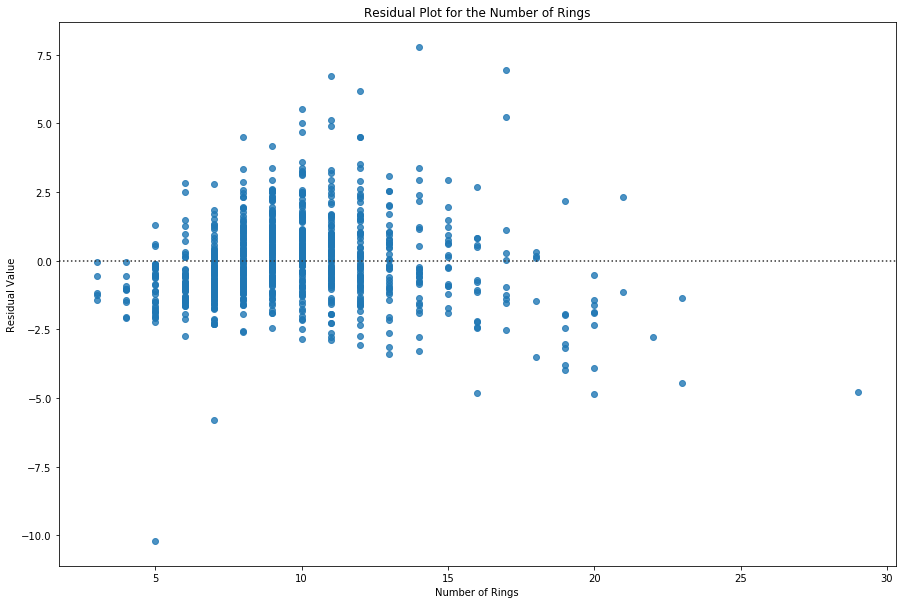

In [542]:
plt.figure(figsize = (15,10))
sns.residplot(y_test, y_pred)
plt.title("Residual Plot for the Number of Rings")
plt.xlabel("Number of Rings")
plt.ylabel("Residual Value")

In [543]:
Coeff = lrm.coef_
Coeff.shape
Coeff = Coeff.reshape(-1,10)
Coeff_df = pd.DataFrame(Coeff, columns = [x2.columns])
Coeff_df

,Length,Diameter,Height,Whole weight,Chucked weight,Viscera weight,Shell Weight,Sex_F,Sex_I,Sex_M
0,-0.306521,11.25965,8.099416,9.373776,-20.169667,-10.673182,8.339025,0.251628,-0.578426,0.326798


In [544]:
lrm.intercept_

3.7678252953760047

#### Further Work

***

#### Improving Regression model

After revisiting this project, I see that we originally used a very odd training testing split with exactly 3000 observations included in the training set (71.82% of the original data set provided to us). 

Simply increasing the training data set size to a more standard 80/20 split resulted in a RMSE dropping from the previous 2.260 to 2.238

Previously we had created a single regression model that was fit and tested against a set of data that included all three of the possible gender options for an abalone (male, female and infant). <br>
Now we've separated our data set using the gender categorical feature and created three separate models trained and tested against each gender to see how each model performs. 

#### Model Performance

In terms of model performance when this project was originally completed for our ENGR 418 course credit, we only observed the root mean squared error. After revisiting this project I've now included the coefficient of determination ($R^2$), and the mean absolute error (MAE) in addition to the root mean square error (RMSE)

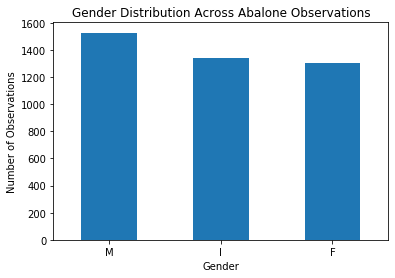

In [545]:
male_obs = df[df['Sex'] == 'M']
female_obs = df[df['Sex'] == 'F']
infant_obs = df[df['Sex'] == 'I']

df['Sex'].value_counts().plot(kind='bar')
plt.title('Gender Distribution Across Abalone Observations')
plt.xlabel('Gender') 
plt.ylabel('Number of Observations')
plt.xticks(rotation = 0)
plt.show()

Each gender has a sufficient number of observation to train and test a regression model 

Text(0, 0.5, 'Predicted Vales')

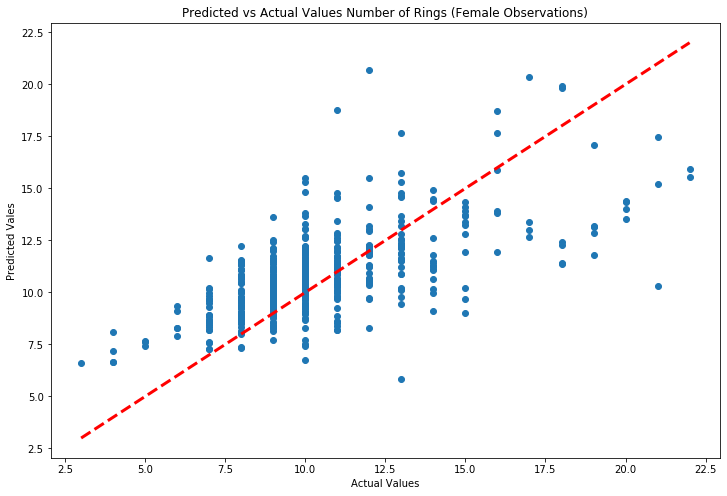

In [546]:
# Male Observations

x = male_obs.drop(['Number Of Rings', 'Sex'], axis=1)
y = male_obs['Number Of Rings']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

lrm = LinearRegression()
lrm.fit(x_train, y_train)
y_pred = lrm.predict(x_test)

entry = pd.DataFrame.from_dict({
     "Model Type": ['Male Data'],
     "Coefficient of Determination":  [r2_score(y_test, y_pred)],
     "Mean Absolute Error": [mean_absolute_error(y_test, y_pred)],
     "Root Mean Square Error":  [np.sqrt(mean_squared_error(y_test, y_pred))]
})

model_metrics_test_data = pd.concat([model_metrics_test_data, entry], ignore_index=True)

plt.figure(figsize = (12,8))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', c = 'red', lw = 3)
plt.title("Predicted vs Actual Values Number of Rings (Female Observations)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Vales")

Text(0, 0.5, 'Predicted Vales')

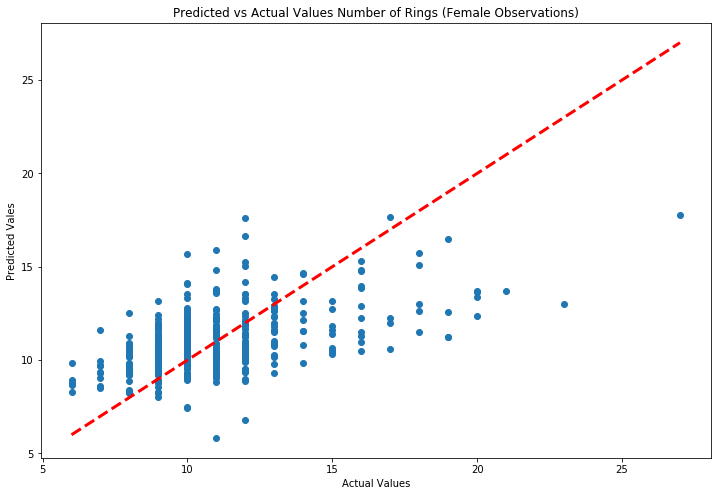

In [547]:
# Female Observations

x = female_obs.drop(["Number Of Rings", "Sex"], axis = 1).values
y = female_obs["Number Of Rings"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

lrm = LinearRegression()
lrm.fit(x_train, y_train)
y_pred = lrm.predict(x_test)

entry = pd.DataFrame.from_dict({
     "Model Type": ['Female Data'],
     "Coefficient of Determination":  [r2_score(y_test, y_pred)],
     "Mean Absolute Error": [mean_absolute_error(y_test, y_pred)],
     "Root Mean Square Error":  [np.sqrt(mean_squared_error(y_test, y_pred))]
})

model_metrics_test_data = pd.concat([model_metrics_test_data, entry], ignore_index=True)

plt.figure(figsize = (12,8))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', c = 'red', lw = 3)
plt.title("Predicted vs Actual Values Number of Rings (Female Observations)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Vales")

Text(0, 0.5, 'Predicted Vales')

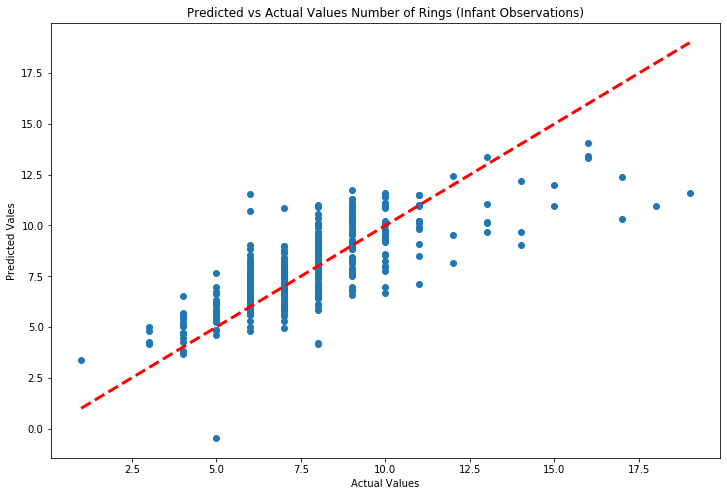

In [550]:
# Infant Observations

x = infant_obs.drop(["Number Of Rings", "Sex"], axis = 1).values
y = infant_obs["Number Of Rings"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

lrm = LinearRegression()
lrm.fit(x_train, y_train)
y_pred = lrm.predict(x_test)

entry = pd.DataFrame.from_dict({
     "Model Type": ['Infant Data'],
     "Coefficient of Determination":  [r2_score(y_test, y_pred)],
     "Mean Absolute Error": [mean_absolute_error(y_test, y_pred)],
     "Root Mean Square Error":  [np.sqrt(mean_squared_error(y_test, y_pred))]
})

model_metrics_test_data = pd.concat([model_metrics_test_data, entry], ignore_index=True)

plt.figure(figsize = (12,8))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', c = 'red', lw = 3)
plt.title("Predicted vs Actual Values Number of Rings (Infant Observations)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Vales")


Summary of Gender Separated Multiple Linear Regression Models

***

As summarized below in our table, the performance metrics of our regression models for the male and female observations performed slightly worse than the model trained with all sexes included. The metrics of the infant model was significantly better than that of the model trained on all genders. 


With this said, our multiple linear regression model makes significantly better predictions about an abalone's number of rings when the observation is of type infant. 

In [551]:
model_metrics_test_data

,Model Type,Coefficient of Determination,Mean Absolute Error,Root Mean Square Error
0,All Data,0.538975,1.581571,2.237606
1,Male Data,0.381405,1.741432,2.331183
2,Female Data,0.278681,1.780939,2.369080
3,Infant Data,0.580086,1.129827,1.550109


***

Further Work:

Attempt to increase model performance by training some non-linear regression models and penalized regression models